# 전처리

In [25]:
import pandas as pd
import numpy as np
import re

In [26]:
df = pd.read_csv('dataset\steam_review_dataset.csv')
df

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1
...,...,...,...,...,...
6417101,99910,Puzzle Pirates,I really ove this game but it needs somethings...,-1,0
6417102,99910,Puzzle Pirates,"Used to play Puzzel Pirates 'way back when', b...",-1,0
6417103,99910,Puzzle Pirates,"This game was aright, though a bit annoying. W...",-1,0
6417104,99910,Puzzle Pirates,"I had a nice review to recommend this game, bu...",-1,0


In [27]:
df.drop(columns=['app_id', 'app_name', 'review_votes'], inplace=True)   # 의미없는 열 삭제
df.rename(columns={'review_text' : 'text' , 'review_score' : 'score'}, inplace=True)
df.dropna(inplace=True) # 결측치 삭제
df.isna().sum() # 결측치 확인

text     0
score    0
dtype: int64

In [28]:
df['score'].value_counts()

 1    5254116
-1    1155685
Name: score, dtype: int64

In [29]:
data = df.sample(10000)
data

,text,score
5644096,"Total drivel. All you do is drive, and occasio...",-1
1384690,Early Access Review,1
4298059,^ You see that? Yep. That is how many hours ...,1
677630,Literally Saints Row 3 but with superpowers. B...,1
3583031,"Armello is a very fun game, some strategy, som...",1
...,...,...
5753759,Great dark &amp; atmospheric puzzle-platformer,1
414597,"I don't always play tower defense games, but w...",1
2101743,"Lovely art, a original fantasy setting and a s...",1
5737532,This game cannot even recognize my mechanical ...,-1


In [30]:
data.duplicated().sum()

1658

In [31]:
data.drop_duplicates(inplace=True)
data.shape

(8342, 2)

In [32]:
data.reset_index(drop=True, inplace=True)

In [33]:
data.to_csv('dataset\steam_review_dataset_clean.csv', index=False)

#### 토큰화

In [34]:
import spacy
import matplotlib.pyplot as plt
from spacy.tokenizer import Tokenizer
from sklearn.model_selection import train_test_split

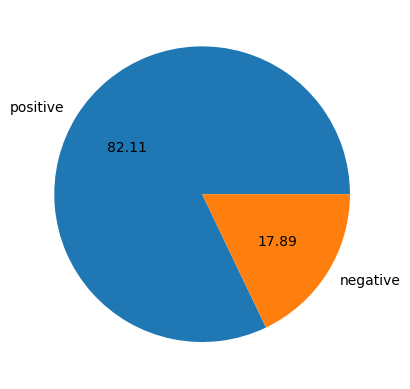

In [35]:
plt.pie(data['score'].value_counts(),labels=['positive','negative'],autopct='%0.2f')
plt.show()

In [36]:
nlp = spacy.load("en_core_web_sm")

tokenizer = Tokenizer(nlp.vocab)

In [37]:
# 토큰화를 위한 파이프라인
def token_pipe(df):

    tokens = []
    # 정규표현식 + '' 기준 단어 분류
    for doc in tokenizer.pipe(df['text']):
        doc_tokens = [re.sub(r"[^a-zA-Z0-9]", "", token.text.lower()) for token in doc]
        # 불용어, 구두점, 정규화 
        for token in doc:
            if (token.is_stop == False) & (token.is_punct == False) & (token.pos_ != 'PRON'):
                doc_tokens.append(token.text.lower())

        
        tokens.append(doc_tokens)

    return tokens

In [38]:
data['tokens'] = token_pipe(data)

In [39]:
data

,text,score,tokens
0,"Total drivel. All you do is drive, and occasio...",-1,"[total, drivel, all, you, do, is, drive, and, ..."
1,Early Access Review,1,"[, early, access, review, , early, access, re..."
2,^ You see that? Yep. That is how many hours ...,1,"[, , you, see, that, , yep, that, is, how, man..."
3,Literally Saints Row 3 but with superpowers. B...,1,"[literally, saints, row, 3, but, with, superpo..."
4,"Armello is a very fun game, some strategy, som...",1,"[armello, is, a, very, fun, game, some, strate..."
...,...,...,...
8337,Great dark &amp; atmospheric puzzle-platformer,1,"[great, dark, amp, atmospheric, puzzleplatform..."
8338,"I don't always play tower defense games, but w...",1,"[i, dont, always, play, tower, defense, games,..."
8339,"Lovely art, a original fantasy setting and a s...",1,"[lovely, art, a, original, fantasy, setting, a..."
8340,This game cannot even recognize my mechanical ...,-1,"[this, game, cannot, even, recognize, my, mech..."


In [40]:
data['tokens'] = data["tokens"].map(' '.join)
data

,text,score,tokens
0,"Total drivel. All you do is drive, and occasio...",-1,total drivel all you do is drive and occasiona...
1,Early Access Review,1,early access review early access review
2,^ You see that? Yep. That is how many hours ...,1,you see that yep that is how many hours of ...
3,Literally Saints Row 3 but with superpowers. B...,1,literally saints row 3 but with superpowers be...
4,"Armello is a very fun game, some strategy, som...",1,armello is a very fun game some strategy some ...
...,...,...,...
8337,Great dark &amp; atmospheric puzzle-platformer,1,great dark amp atmospheric puzzleplatformer gr...
8338,"I don't always play tower defense games, but w...",1,i dont always play tower defense games but whe...
8339,"Lovely art, a original fantasy setting and a s...",1,lovely art a original fantasy setting and a st...
8340,This game cannot even recognize my mechanical ...,-1,this game cannot even recognize my mechanical ...


In [41]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height=500,min_font_size = 10,background_color = 'white')

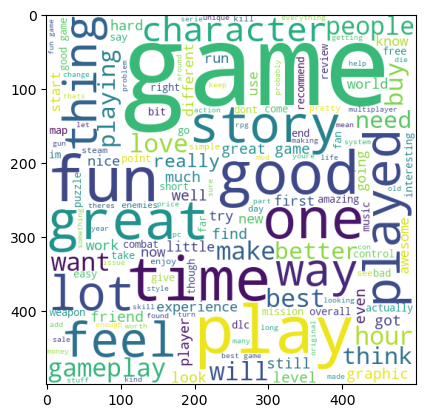

In [42]:
pos_wc = wc.generate(data[data['score']==1]['tokens'].str.cat(sep=" "))
plt.imshow(pos_wc)
plt.show()

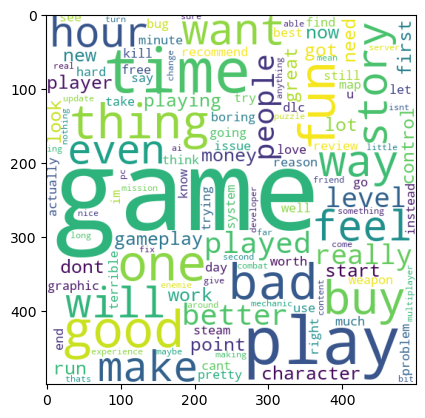

In [43]:
neg_wc = wc.generate(data[data['score']==-1]['tokens'].str.cat(sep=" "))
plt.imshow(neg_wc)
plt.show()

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(max_features=3000)
X = count_vec.fit_transform(data['tokens']).toarray()

#### 모델링

In [45]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
y = data['score'].values
y

array([-1,  1,  1, ...,  1, -1,  1], dtype=int64)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6673, 3000), (1669, 3000), (6673,), (1669,))

In [48]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(4200000, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=5, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/5
84/84 [==============================] - ETA: 0s - loss: 0.6587 - acc: 0.8196
Epoch 1: val_acc improved from -inf to 0.81498, saving model to best_model.h5
84/84 [==============================] - 793s 9s/step - loss: 0.6587 - acc: 0.8196 - val_loss: 0.6609 - val_acc: 0.8150
Epoch 2/5
84/84 [==============================] - ETA: 0s - loss: 0.6557 - acc: 0.8196
Epoch 2: val_acc did not improve from 0.81498
84/84 [==============================] - 848s 10s/step - loss: 0.6557 - acc: 0.8196 - val_loss: 0.6729 - val_acc: 0.8150
Epoch 3/5
84/84 [==============================] - ETA: 0s - loss: 0.6551 - acc: 0.8196 
Epoch 3: val_acc did not improve from 0.81498
84/84 [==============================] - 885s 11s/step - loss: 0.6551 - acc: 0.8196 - val_loss: 0.6599 - val_acc: 0.8150
Epoch 4/5
84/84 [==============================] - ETA: 0s - loss: 0.6559 - acc: 0.8196 
Epoch 4: val_acc did not improve from 0.81498
84/84 [==============================] - 889s 11s/step - loss: 0.655

In [51]:
model.evaluate(X_test, y_test)

53/53 [==============================] - 22s 422ms/step - loss: 0.6420 - acc: 0.8310


[0.6420096755027771, 0.8310365676879883]

#### 문장 생성후 테스트

In [52]:
# 토큰화를 위한 파이프라인
def token_test(df):

    tokens = []
    # 정규표현식 + '' 기준 단어 분류
    for doc in tokenizer.pipe(df):
        doc_tokens = [re.sub(r"[^a-zA-Z0-9]", "", token.text.lower()) for token in doc]
        # 불용어, 구두점, 정규화 
        for token in doc:
            if (token.is_stop == False) & (token.is_punct == False) & (token.pos_ != 'PRON'):
                doc_tokens.append(token.text.lower())

        tokens.append(doc_tokens)

    return ' '.join(tokens)

In [66]:
def checker(new_sentence):
  new_sentence = re.sub(r"[^a-zA-Z0-9]", "", new_sentence)
  new_sentence = tokenizer(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in nlp] # 불용어 제거
  encoded = count_vec.fit_transform(new_sentence) # 정수 인코딩
  score = float(model.predict(encoded)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [67]:
checker('this game is a waste of time')

TypeError: argument of type 'English' is not iterable

In [55]:
checker('I really loved this game')

TypeError: sequence item 0: expected str instance, list found